In [1]:
import sys
sys.path.append("../src")
import os
import numpy as np
import os
from training import load_model, TrainModel
import tensorflow as tf
import pickle
from sindy_utils import sindy_simulate, sindy_library_names

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from analyze import get_names, get_checkpoint_names
from default_params import params
from tqdm import tqdm
import seaborn as sns

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
filename = 'results_202208161402_pendulum_rando'
print(filename)
cpath = params['data_path'] +'/'+ filename+'/checkpoints/'
cp_files = get_checkpoint_names(filename)

results_202208161402_pendulum_rando


FileNotFoundError: [Errno 2] No such file or directory: 'results_202208161402_pendulum_rando'

In [3]:
import os
os.listdir(cpath)

[]

In [15]:
cpath

'/Users/josephbakarji/Documents/academic/research/delay-auto-embedding/github_repo/testcases/results/results_202208161402_pendulum_rando/checkpoints/'

In [15]:
plt.rcParams["animation.html"] = "jshtml"

In [20]:


p = params
p['tend'] = 30
data = params2data(p)
trainer = TrainModel(data, p)

poly_order = p['poly_order']
include_sine = p['include_sine']
exact_features = p['exact_features']

coef_names = sindy_library_names(p['latent_dim'], p['poly_order'], include_sine=False, exact_features=p['exact_features'])
coef_names_full = sindy_library_names(p['latent_dim'], p['poly_order'], include_sine=False, exact_features=False)

data.training_split(0.1)

train_data, test_data = data.get_train_test()
train_time, test_time = data.get_times()

z0 = np.array([1/40, 1/40, 1/40])
lorenz_sim = sindy_simulate(z0, test_time, data.sindy_coefficients, poly_order, include_sine)

zl_list = []
zs_list = []
coef_list = []

for i in range(len(cp_files)):
    name = cp_files[i]
    trainer.model.load_weights(cpath+name+'.ckpt').expect_partial()
    z_latent = trainer.model.encoder(test_data[0]).numpy()
    z_sim = sindy_simulate(z0, test_time, trainer.model.sindy.coefficients_mask* trainer.model.sindy.coefficients, 
                                poly_order, include_sine, exact_features=exact_features)

    zl_list.append(z_latent)
    zs_list.append(z_sim)
    coef_list.append(trainer.model.sindy.coefficients.numpy())


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


ValueError: 'r--' is not a valid value for color

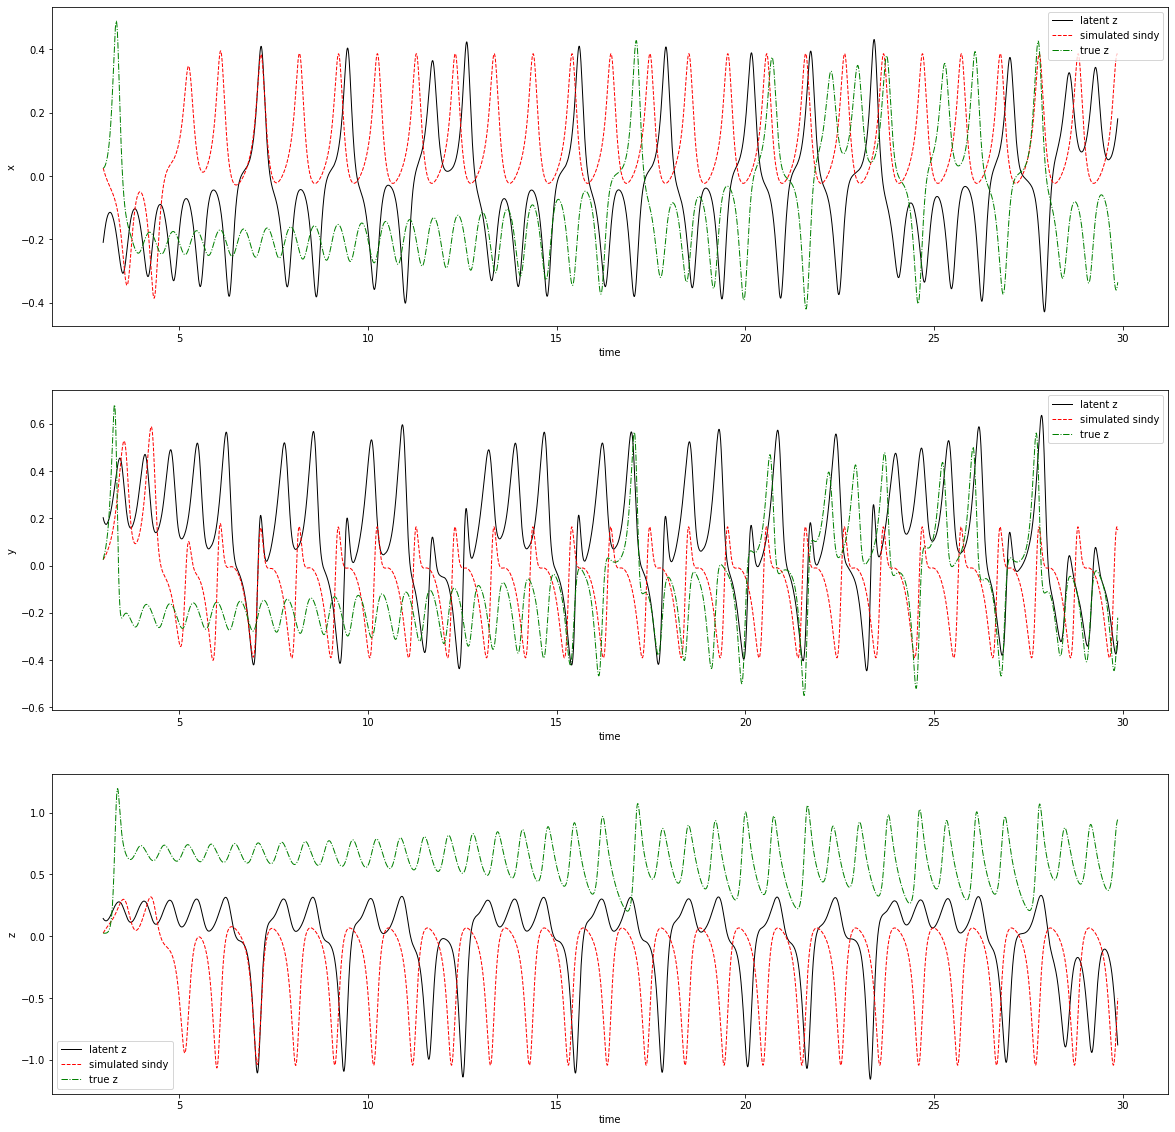

In [26]:


# fig = plt.figure(figsize=(10, 10))
# ax3 = fig.add_subplot(111, projection='3d')
# ax3.plot(zl_list[0][:, 0], zl_list[0][:, 1], zl_list[0][:, 2], color = 'k', linewidth=1)
# ax3.legend(['latent z', 'simulated sindy', 'true z'])


# def animate(i):
#     ax3.clear()
#     ax3.plot(zl_list[i][:, 0], zl_list[i][:, 1], zl_list[i][:, 2], color = 'k', linewidth=1, alpha=0.5)
#     ax3.plot(zs_list[i][:, 0], zs_list[i][:, 1], zs_list[i][:, 2], color = 'r', linewidth=0.5, alpha=0.5)
#     ax3.plot(lorenz_sim[:, 0], lorenz_sim[:, 1], lorenz_sim[:, 2], color = 'g', linewidth=0.5, alpha=0.8)
#     ax3.legend(['latent z', 'simulated sindy', 'true z'])
#     ax3.set_xlabel('x')
#     ax3.set_ylabel('y')
#     ax3.set_zlabel('z')

#     return [ax3]

fig = plt.figure(figsize=(20, 20))
axx = fig.add_subplot(311)
axx.plot(test_time, zl_list[0][:, 0], color = 'k', linewidth=1)
axx.plot(test_time, zs_list[0][:, 0], color = 'r', linewidth=1)
axx.plot(test_time, lorenz_sim[:, 0], color = 'g', linewidth=1)
axx.set_xlabel('time')
axx.set_ylabel('x')

axy = fig.add_subplot(312)
axy.plot(test_time, zl_list[0][:, 1], color = 'k', linewidth=1)
axy.plot(test_time, zs_list[0][:, 1], color = 'r', linewidth=1)
axy.plot(test_time, lorenz_sim[:, 1], color = 'g', linewidth=1)
axy.set_xlabel('time')
axy.set_ylabel('y')

axz = fig.add_subplot(313)
axz.plot(test_time, zl_list[0][:, 2], color = 'k', linewidth=1)
axz.plot(test_time, zs_list[0][:, 2], color = 'r', linewidth=1)
axz.plot(test_time, lorenz_sim[:, 2], color = 'g', linewidth=1)
axz.set_xlabel('time')
axz.set_ylabel('z')

def animate2(i):
    axx.clear()
    axy.clear()
    axz.clear()

    axx.plot(test_time, zl_list[i][:, 0], 'k', linewidth=1)
    axx.plot(test_time, zs_list[i][:, 0], 'r--', linewidth=1)
    axx.plot(test_time, lorenz_sim[:, 0], 'g-.', linewidth=1)
    axx.set_xlabel('time')
    axx.set_ylabel('x')

    axy.plot(test_time, zl_list[i][:, 1], 'k', linewidth=1)
    axy.plot(test_time, zs_list[i][:, 1], 'r--', linewidth=1)
    axy.plot(test_time, lorenz_sim[:, 1], 'g-.', linewidth=1)
    axy.set_xlabel('time')
    axy.set_ylabel('y')

    axz.plot(test_time, zl_list[i][:, 2], 'k', linewidth=1)
    axz.plot(test_time, zs_list[i][:, 2], 'r--', linewidth=1)
    axz.plot(test_time, lorenz_sim[:, 2], 'g-.', linewidth=1)
    axz.set_xlabel('time')
    axz.set_ylabel('z')

    axx.legend(['latent z', 'simulated sindy', 'true z'])
    axy.legend(['latent z', 'simulated sindy', 'true z'])
    axz.legend(['latent z', 'simulated sindy', 'true z'])

    return [axx, axy, axz]

# run the animation
animation = FuncAnimation(fig, animate2, frames=len(zl_list), interval=50)
# HTML(animation.to_html5_video())
animation.save('./figures/'+ filename +'_animation_2'+ '.mp4')

# titles = ['$\dot x$', '$\dot y$', '$\dot z$']
# true_coefs = p['actual_coefficients']
# coef_array = np.array(coef_list)
# nc = coef_array.shape[0]
# threshold = 1e-2
# cmap = sns.color_palette()

# fig = plt.figure(figsize=(20, 5))
# ax = []
# for i in range(3):
#     a = fig.add_subplot(1, 3, i+1)
#     leg = []
#     for cidx, coef in enumerate(coef_names):
#         tc = true_coefs[cidx, i]
#         if abs(coef_array[-1, cidx, i]) > threshold:
#             a.plot(np.arange(nc), coef_array[:, cidx, i], '.-', color=cmap[cidx])
#             leg.append(coef_names[cidx])
#         if abs(tc) > threshold:
#             a.plot([0, nc], [tc, tc], '--', color=cmap[cidx])
#             leg.append(coef_names[cidx])

#     a.legend(leg)
#     a.set_title(titles[i])
#     a.set_xlabel('epoch')
#     a.set_ylabel('coef value')
#     ax.append(a)
# plt.savefig('./figures/'+ name +'_coefficients_'+ '.pdf')
# plt.show()
# # animation.save('example.mp4')

In [12]:
zl_list

[]

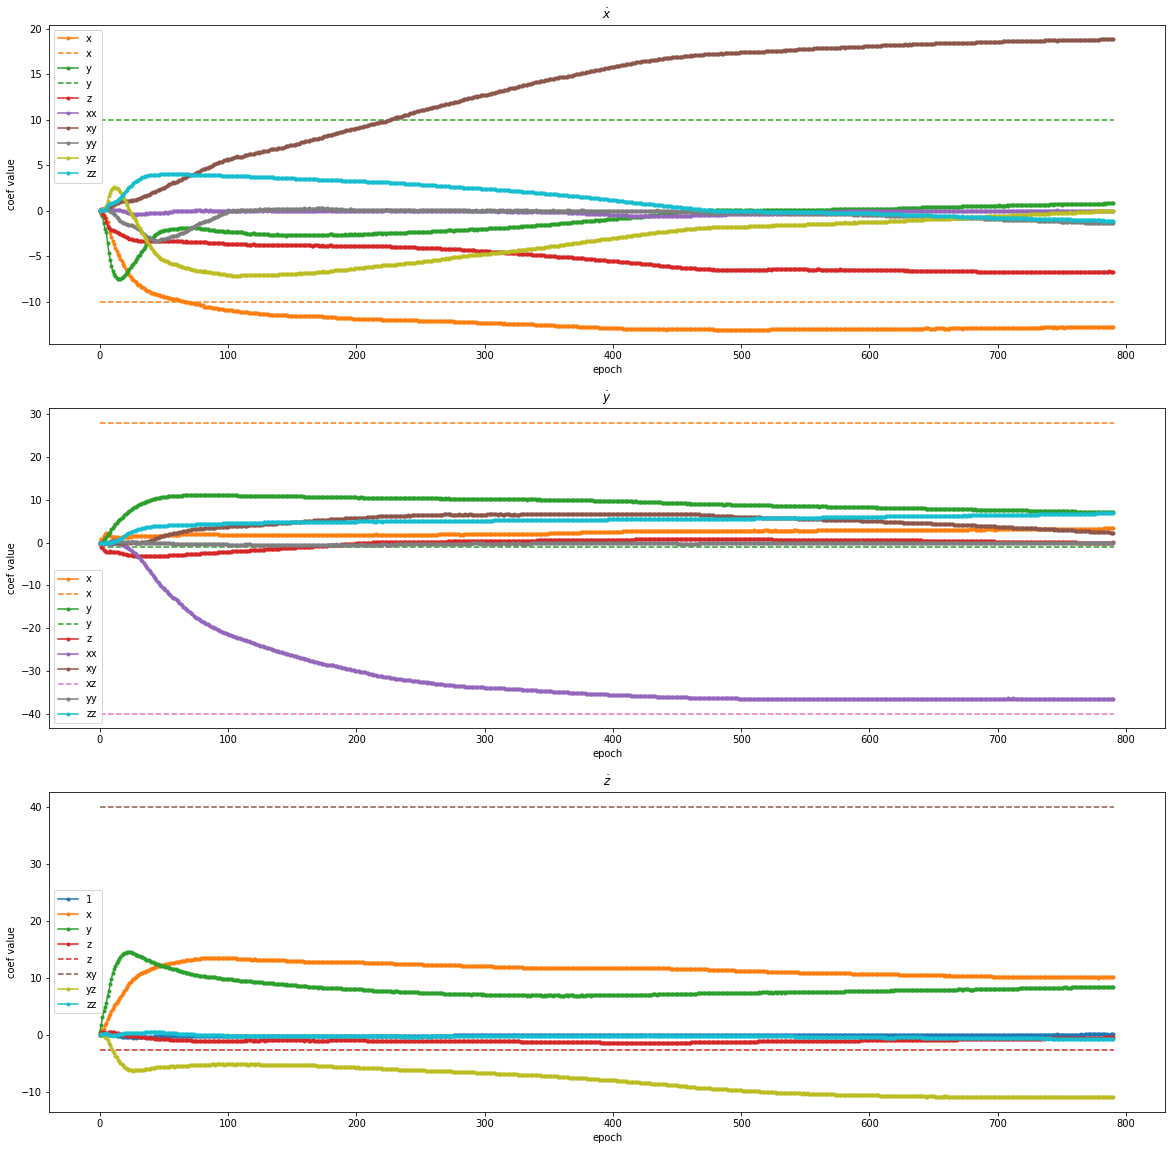

In [27]:
import seaborn as sns

titles = ['$\dot x$', '$\dot y$', '$\dot z$']
true_coefs = p['actual_coefficients']
coef_array = np.array(coef_list)
nc = coef_array.shape[0]
threshold = 1e-2
cmap = sns.color_palette()

fig = plt.figure(figsize=(20, 20))
ax = []
for i in range(3):
    a = fig.add_subplot(3, 1, i+1)
    leg = []
    for cidx, coef in enumerate(coef_names):
        tc = true_coefs[cidx, i]
        if abs(coef_array[-1, cidx, i]) > threshold:
            a.plot(np.arange(nc), coef_array[:, cidx, i], '.-', color=cmap[cidx])
            leg.append(coef_names[cidx])
        if abs(tc) > threshold:
            a.plot([0, nc], [tc, tc], '--', color=cmap[cidx])
            leg.append(coef_names[cidx])
            
    a.legend(leg)
    a.set_title(titles[i])
    a.set_xlabel('epoch')
    a.set_ylabel('coef value')
    ax.append(a)
               
plt.show()